<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Normalization:-StandardScaler" data-toc-modified-id="Normalization:-StandardScaler-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Normalization: StandardScaler</a></span></li></ul></li><li><span><a href="#Scenario-A-:-Using-Random-Forest" data-toc-modified-id="Scenario-A-:-Using-Random-Forest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scenario A : Using Random Forest</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Train:-Best-Estimator-&amp;-Best-Score" data-toc-modified-id="Train:-Best-Estimator-&amp;-Best-Score-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Train: Best Estimator &amp; Best Score</a></span></li><li><span><a href="#Train-Model-with-estimators" data-toc-modified-id="Train-Model-with-estimators-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Train Model with estimators</a></span></li><li><span><a href="#Predict:-y_test" data-toc-modified-id="Predict:-y_test-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Predict: y_test</a></span></li></ul></li><li><span><a href="#Scenario-B-:-Random-Forest-+-PCA" data-toc-modified-id="Scenario-B-:-Random-Forest-+-PCA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scenario B : Random Forest + PCA</a></span><ul class="toc-item"><li><span><a href="#Additional-Feature-Engineering" data-toc-modified-id="Additional-Feature-Engineering-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Additional Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Train:-Best-Estimator-&amp;-Best-Score" data-toc-modified-id="Train:-Best-Estimator-&amp;-Best-Score-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Train: Best Estimator &amp; Best Score</a></span></li><li><span><a href="#Train-Model-with-estimators" data-toc-modified-id="Train-Model-with-estimators-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Train Model with estimators</a></span></li><li><span><a href="#Predict:-y_test" data-toc-modified-id="Predict:-y_test-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Predict: y_test</a></span></li></ul></li><li><span><a href="#Compare-Scenario-A-and-Scenario-B" data-toc-modified-id="Compare-Scenario-A-and-Scenario-B-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Compare Scenario A and Scenario B</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

## Objective

``` 
Objective is to compare Random Forest model predictions with and without principal component analysis(PCA)'s dimensionality reduction. And also, learn through reverse engineering. 

Scenario A : Run Random Forest, an ensembel model,  on a normalized dataset with optimal parameters.
Scenario B : Run Random Forest as above. But, after dimensionality reduction using PCA.
```

## Import Packages

In [1]:
### DataFrame ####
import numpy as np
import pandas as pd

### Visualization ####
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Scikit ####
from sklearn.model_selection import train_test_split
np.random.seed(42)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

### Others ###
import time
import warnings
warnings.filterwarnings('ignore')


> ## Get Data

In [3]:
# for kaggle kernel
#train_set = pd.read_csv("../input/train.csv")
#test_set = pd.read_csv("../input/test.csv")

In [4]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [5]:
# copy the datasets to avoid corrupting the orginaldataset. 

train = train_set.copy()
test = test_set.copy()

In [6]:
# train shape
print("train shape:",train.shape)

# Normalising data by dividing it by 255 should improve activation functions performance
y_train = train['label'].values
X_train = train.drop(columns=['label']).values/255
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

train shape: (42000, 785)
X_train shape: (42000, 784)
y_train shape: (42000,)


In [7]:
# test shape
print("test shape:",test.shape)

# y_test, to predict this ?
X_test = test.values/255
print("X_train shape:", X_test.shape)

test shape: (28000, 784)
X_train shape: (28000, 784)


|Dataset|# Instances|% of Total| 
|---|---|---|
|total Instances | 70000 |--- |
| Train set| 42000| 60% of the total |
| Test set | 28000| 40% of the total |

## Exploratory Data Analysis

In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


## Feature Engineering

### Normalization: StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Scenario A : Using Random Forest

### Random Forest

In [9]:
# Model
rf = RandomForestClassifier(warm_start=True, n_jobs=-1, random_state=42)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

### Train: Best Estimator & Best Score 

In [10]:
train_scores_a = []
train_best_score_a = 0
train_best_estimators_a = 0

# Time
start_time = time.time()

# estimator range 1,5,10....100
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    
    #fit the model
    rf.fit(X_train, y_train)
    
    #Train score
    train_score_a = rf.score(X_train, y_train)
    train_scores_a.append(train_score_a)
    if train_score_a>train_best_score_a:
        train_best_score_a = train_score_a
        train_best_estimators_a = n_estimators

print("Time taken:--- %s seconds ---" % (time.time() - start_time))
print("--------------------for Scenario A----------------------------------------")
print(" Train- best score :%s" %train_best_score_a)
print(" Train- Estimator :%s " %train_best_estimators_a)


Time taken:--- 29.405423641204834 seconds ---
--------------------for Scenario A----------------------------------------
 Train- best score :1.0
 Train- Estimator :36 


### Train Model with estimators

In [11]:
# run the Model with best estimators
rft = RandomForestClassifier(warm_start=True, n_jobs=-1,n_estimators=train_best_estimators_a, random_state=42)
rft

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [12]:
# Time
start_time = time.time()
rft.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [13]:
# quick check on the accuracy score.
y_predict_train = rft.predict(X_train)

# time taken
print("Time taken:--- %s seconds ---" % (time.time() - start_time))
print(accuracy_score(y_train, y_predict_train))

Time taken:--- 5.000222444534302 seconds ---
1.0


### Predict: y_test

In [14]:
y_predict_A = rft.predict(X_test) 

In [15]:
# let create our own kaggle accurancy score index.

# Submission csv by a topper in this competition. He/she accurracy is 1.Great job !
# y_test_kaggle = pd.read_csv('y_test_Kaggle.csv')
# y_test_kag_values = y_test_kaggle['Label'].values

# what this scenario's accurracy score when compared to the topper's submission?
# accuracy_score(y_predict_A,y_test_kag_values)

My Kaggle entry results: Your submission scored 0.95971, which is not an improvement of your best score. Keep trying!

So, my score accuracy is almost matching with Kaggle score index. 

In [16]:
#sub = pd.read_csv('sample_submission.csv')
#sub['Label'] = y_predict_A
#sub.to_csv('submission_A.csv',index=False)

## Scenario B : Random Forest + PCA

### Additional Feature Engineering

#### PCA

In [17]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
# PCA features
features = range(pca.n_components_)
features

range(0, 784)

In [19]:
# number of intrinsic dimensions
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1
d

320

In [20]:
# total variance of the intrinsic dimensions
np.sum(pca.explained_variance_ratio_)

1.0

In [21]:
# datasets after dimensionality reduction

pca = PCA(n_components=d)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)

(42000, 320)
(28000, 320)


### Random Forest 

In [22]:
# Model
rf_pca = RandomForestClassifier(warm_start=True, n_jobs=-1, random_state=42)
rf_pca

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

### Train: Best Estimator & Best Score 

In [23]:
train_scores_b = []
train_best_score_b = 0
train_best_estimators_b = 0

# Time
start_time = time.time()

# estimator range 1,5,10....100
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf_pca.n_estimators = n_estimators
    
    #fit the model
    rf_pca.fit(X_train_reduced, y_train)
    
    #Train score
    train_score_b = rf_pca.score(X_train_reduced, y_train)
    train_scores_b.append(train_score_b)
    if train_score_b>train_best_score_b:
        train_best_score_b = train_score_b
        train_best_estimators_b = n_estimators

print("Time taken:--- %s seconds ---" % (time.time() - start_time))
print("------------------for Scenario B------------------------------------------")
print(" Train- best score :%s" %train_best_score_b)
print(" Train- Estimator:%s " %train_best_estimators_b)

Time taken:--- 58.47668218612671 seconds ---
------------------for Scenario B------------------------------------------
 Train- best score :1.0
 Train- Estimator:26 


### Train Model with estimators

In [24]:
# Model with best estimators
rft_pca = RandomForestClassifier(warm_start=True, n_jobs=-1,n_estimators=train_best_estimators_b, random_state=42)
rft_pca

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [25]:
# Time
start_time = time.time()

rft_pca.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [26]:
# Qucik check on accuracy
y_predict_trainB = rft_pca.predict(X_train_reduced)
print("Time taken:--- %s seconds ---" % (time.time() - start_time))
print(accuracy_score(y_train, y_predict_trainB))

Time taken:--- 10.95213532447815 seconds ---
1.0


### Predict: y_test

In [27]:
y_predict_B = rft_pca.predict(X_test_reduced) 

In [28]:
# let create our own kaggle accurancy score index.
# accuracy_score(y_predict_B,y_test_kag_values)

Correct ! scored less with random forest post PCA. 

In [29]:
#sub = pd.read_csv('sample_submission.csv')
#sub['Label'] = y_predict_B
#sub.to_csv('submission_B.csv',index=False)

## Compare Scenario A and Scenario B

In [30]:
# accurancy score
accuracy_score(y_predict_A, y_predict_B)

0.9172857142857143

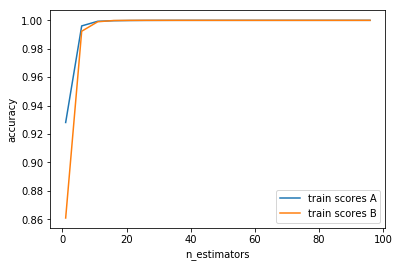

In [31]:
plt.plot(estimator_range, train_scores_a, label="train scores A")
plt.plot(estimator_range, train_scores_b, label="train scores B")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

## Conclusion

```
We went through exploratory data analysis, feature engineering, modeling with Random Forest, and then hyperparameter tuning on our model.

In case of identifying hyperparameters(especially,n-estimators, ie number of decision trees to use for random forest model) , using GridSearchCV is taking more time to complete. Hence, I used simple search of n_estimators using best model score.  

```

|Scenarios|Normalized | PCA  |# Best n-estimators  | Kaggel scores| Time taken |
|---|---|---|---|---|---|
|Scenario A | Yes | No | 36 | 0.9614642857142857 | 5.425583839416504 seconds 
|Scenario B | Yes | Yes | 26 | 0.9181428571428571 |10.780927181243896 seconds 

```
To summarize, Dimensionality reduction using PCA, is not very helpful to improve accuracy score of Random Forest Model. 
```

## Appendix

```Random forest is ensemble machine learning model that is formed by a combination of less complex models. In this case, Random Forest is made up of combinations of Decision Tree classifiers.

How this work is through a technique called bagging. In bagging, each Decision Tree trains on a different subsample of the training data and then their predictions are combined for a final output.

In ensembling a lot of decision trees is that the final prediction is much better than each individual classifier because they pick up on different trends in the data.```

```
n_estimators is the number of decision trees to use for our random forest model.

max_depth is the maximum depth of each decision tree.

min_samples_leaf is the minimum number of samples required to be at a leaf node in each decision tree.

It should be noted that grid search is a computationally intensive task on large data sets and that n_estimators could be a feature that is low priority for grid searching, since models with more tree estimators tend to perform better.
```